In [6]:
#Merge files
import pandas as pd
import os

# 1. Set the directory where your CSVs are stored
data_dir = r"C:\Users\S\Desktop\SecureNet\data\GeneratedLabelledFlows\TrafficLabelling"

# 2. List of all 8 CICIDS2017 CSV files
csv_files = [
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
]

# 3. Load and merge all the CSVs
merged_df_list = []
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    print(f"Reading {file_path} ...")
    df = pd.read_csv(file_path, encoding='cp1252', low_memory=False)
    df["source_file"] = file  # optional: keep track of source
    merged_df_list.append(df)

# 4. Concatenate them into a single DataFrame
full_df = pd.concat(merged_df_list, ignore_index=True)

# 5. Save the combined dataset to a new CSV file
output_path = r"C:\Users\S\Desktop\SecureNet\data\raw\CICIDS2017_FULL.csv"
full_df.to_csv(output_path, index=False)

print(f"\n✅ Merge complete! Combined file saved to:\n{output_path}")


Reading C:\Users\S\Desktop\SecureNet\data\GeneratedLabelledFlows\TrafficLabelling\Monday-WorkingHours.pcap_ISCX.csv ...
Reading C:\Users\S\Desktop\SecureNet\data\GeneratedLabelledFlows\TrafficLabelling\Tuesday-WorkingHours.pcap_ISCX.csv ...
Reading C:\Users\S\Desktop\SecureNet\data\GeneratedLabelledFlows\TrafficLabelling\Wednesday-workingHours.pcap_ISCX.csv ...
Reading C:\Users\S\Desktop\SecureNet\data\GeneratedLabelledFlows\TrafficLabelling\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv ...
Reading C:\Users\S\Desktop\SecureNet\data\GeneratedLabelledFlows\TrafficLabelling\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv ...
Reading C:\Users\S\Desktop\SecureNet\data\GeneratedLabelledFlows\TrafficLabelling\Friday-WorkingHours-Morning.pcap_ISCX.csv ...
Reading C:\Users\S\Desktop\SecureNet\data\GeneratedLabelledFlows\TrafficLabelling\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv ...
Reading C:\Users\S\Desktop\SecureNet\data\GeneratedLabelledFlows\TrafficLabelling\Frid

✅ Data loaded successfully!
📊 Dataset shape: (3119345, 86)

📋 BASIC DATASET INFORMATION
Dataset Shape: (3119345, 86)
Memory Usage: 3105.13 MB

🏷️ Column Names:
 1. Flow ID
 2.  Source IP
 3.  Source Port
 4.  Destination IP
 5.  Destination Port
 6.  Protocol
 7.  Timestamp
 8.  Flow Duration
 9.  Total Fwd Packets
10.  Total Backward Packets
11. Total Length of Fwd Packets
12.  Total Length of Bwd Packets
13.  Fwd Packet Length Max
14.  Fwd Packet Length Min
15.  Fwd Packet Length Mean
16.  Fwd Packet Length Std
17. Bwd Packet Length Max
18.  Bwd Packet Length Min
19.  Bwd Packet Length Mean
20.  Bwd Packet Length Std
21. Flow Bytes/s
22.  Flow Packets/s
23.  Flow IAT Mean
24.  Flow IAT Std
25.  Flow IAT Max
26.  Flow IAT Min
27. Fwd IAT Total
28.  Fwd IAT Mean
29.  Fwd IAT Std
30.  Fwd IAT Max
31.  Fwd IAT Min
32. Bwd IAT Total
33.  Bwd IAT Mean
34.  Bwd IAT Std
35.  Bwd IAT Max
36.  Bwd IAT Min
37. Fwd PSH Flags
38.  Bwd PSH Flags
39.  Fwd URG Flags
40.  Bwd URG Flags
41.  Fwd Heade

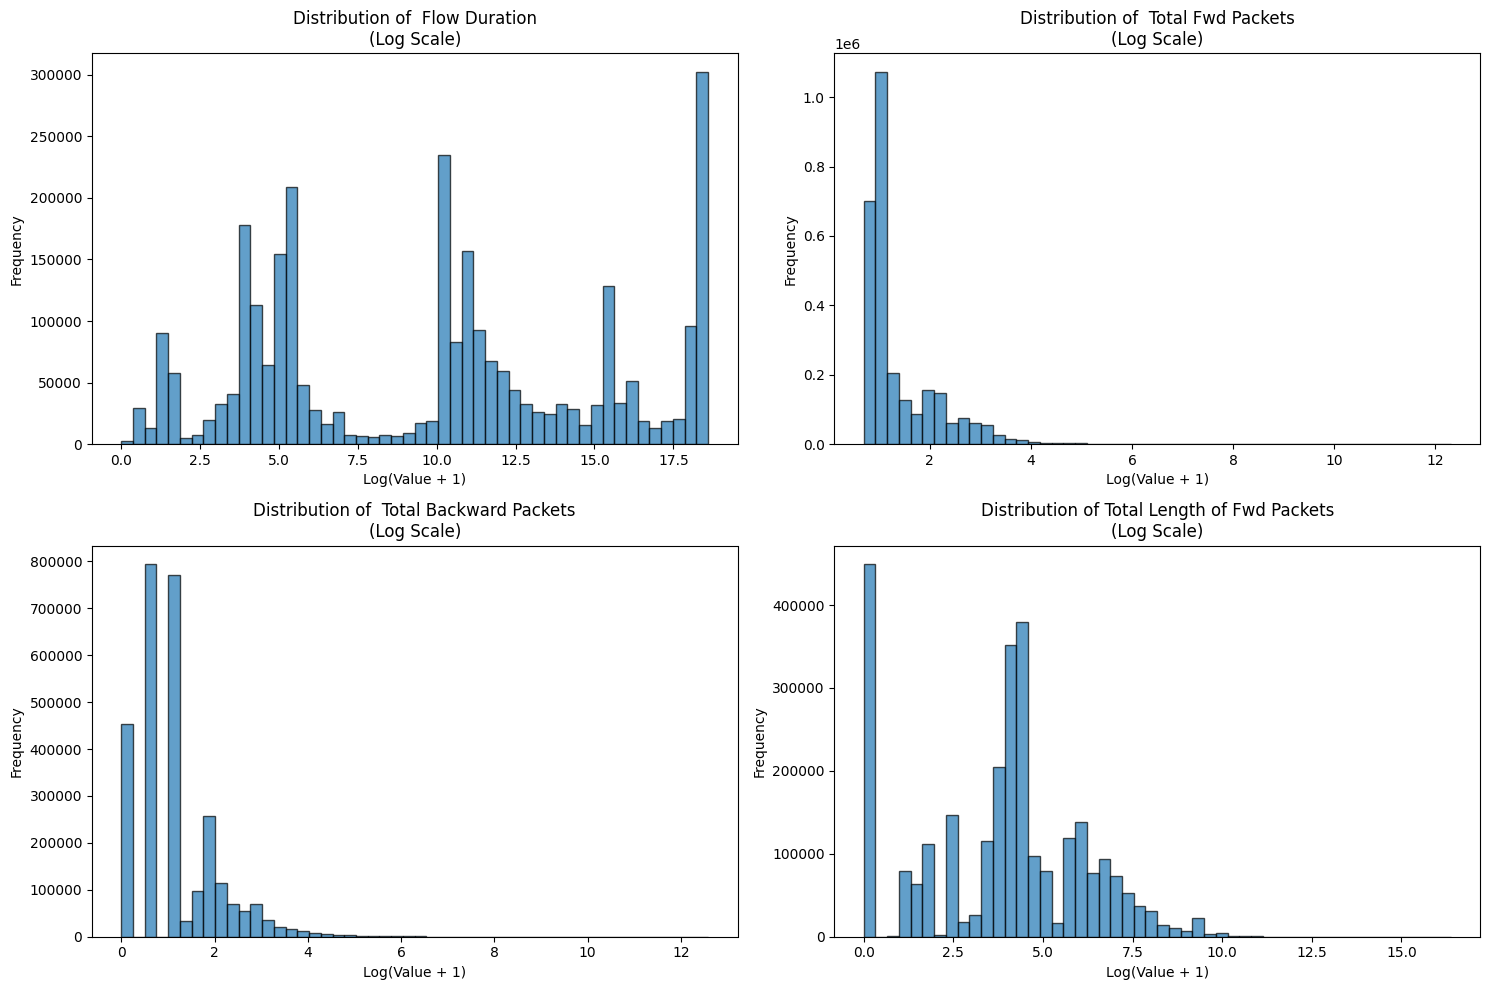


🚨 BASIC ANOMALY DETECTION
📈  Flow Duration:
   Anomalies: 532,586 (18.81%)
   Range: [-13.00, 119999998.00]
   Normal Range: [-4806855.25, 8011838.75]
📈  Total Fwd Packets:
   Anomalies: 332,693 (11.75%)
   Range: [1.00, 219759.00]
   Normal Range: [-2.50, 9.50]
📈  Total Backward Packets:
   Anomalies: 308,291 (10.89%)
   Range: [0.00, 291922.00]
   Normal Range: [-3.50, 8.50]
📈 Total Length of Fwd Packets:
   Anomalies: 446,972 (15.79%)
   Range: [0.00, 12900000.00]
   Normal Range: [-250.50, 449.50]
📈  Total Length of Bwd Packets:
   Anomalies: 619,046 (21.87%)
   Range: [0.00, 655453030.00]
   Normal Range: [-723.00, 1205.00]


In [10]:
#Data Exploration and Initial Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

def load_and_explore_data(file_path):
    """
    Load the CIC-IDS2017 dataset and perform initial exploration
    """
    
    # Load the data (adjust file path as needed)
    try:
        df = pd.read_csv(file_path)
        print(f"✅ Data loaded successfully!")
        print(f"📊 Dataset shape: {df.shape}")
        
    except FileNotFoundError:
        print("❌ File not found. Please check your file path.")
        return None
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None
    
    return df

def basic_data_info(df):
    """
    Display basic information about the dataset
    """
    print("\n" + "="*50)
    print("📋 BASIC DATASET INFORMATION")
    print("="*50)
    
    print(f"Dataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n🏷️ Column Names:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")
    
    print("\n📊 Data Types:")
    print(df.dtypes.value_counts())
    
    print("\n🔍 Missing Values:")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Percentage': missing_percent
    }).sort_values('Missing Count', ascending=False)
    
    print(missing_df[missing_df['Missing Count'] > 0].head(10))
    
    return missing_df

def analyze_target_variable(df):
    """
    Analyze the target variable (Label column)
    """
    print("\n" + "="*50)
    print("🎯 TARGET VARIABLE ANALYSIS")
    print("="*50)
    
    if 'Label' in df.columns:
        print("Attack Type Distribution:")
        label_counts = df['Label'].value_counts()
        print(label_counts)
        
        print(f"\nTotal Attack Types: {df['Label'].nunique()}")
        print(f"Normal Traffic: {label_counts.get('BENIGN', 0):,} ({label_counts.get('BENIGN', 0)/len(df)*100:.1f}%)")
        print(f"Attack Traffic: {len(df) - label_counts.get('BENIGN', 0):,} ({(len(df) - label_counts.get('BENIGN', 0))/len(df)*100:.1f}%)")
        
        # Create visualization
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        # Binary classification view
        binary_labels = df['Label'].apply(lambda x: 'Normal' if x == 'BENIGN' else 'Attack')
        binary_counts = binary_labels.value_counts()
        plt.pie(binary_counts.values, labels=binary_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title('Normal vs Attack Traffic')
        
        plt.subplot(1, 2, 2)
        # Top attack types
        attack_types = df[df['Label'] != 'BENIGN']['Label'].value_counts().head(8)
        plt.barh(range(len(attack_types)), attack_types.values)
        plt.yticks(range(len(attack_types)), attack_types.index)
        plt.xlabel('Count')
        plt.title('Top Attack Types')
        plt.gca().invert_yaxis()
        
        plt.tight_layout()
        plt.show()
        
        return label_counts
    else:
        print("❌ No 'Label' column found!")
        return None

def analyze_network_features(df):
    """
    Analyze key network traffic features
    """
    print("\n" + "="*50)
    print("🌐 NETWORK FEATURES ANALYSIS")
    print("="*50)
    
    # Key network features to analyze
    network_features = [
        'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
        'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
        'Flow Bytes/s', 'Flow Packets/s'
    ]
    
    # Find actual column names (case-insensitive matching)
    actual_features = []
    for feature in network_features:
        matches = [col for col in df.columns if feature.lower() in col.lower()]
        if matches:
            actual_features.append(matches[0])
    
    print(f"Found {len(actual_features)} network features to analyze:")
    for feature in actual_features:
        print(f"  • {feature}")
    
    if actual_features:
        # Statistical summary
        print(f"\n📊 Statistical Summary:")
        summary_stats = df[actual_features].describe()
        print(summary_stats)
        
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Distribution plots for first 4 features
        for i, feature in enumerate(actual_features[:4]):
            row, col = i // 2, i % 2
            
            # Handle potential infinite values
            clean_data = df[feature].replace([np.inf, -np.inf], np.nan).dropna()
            
            if len(clean_data) > 0:
                # Log scale for better visualization of network data
                log_data = np.log1p(clean_data[clean_data >= 0])
                axes[row, col].hist(log_data, bins=50, alpha=0.7, edgecolor='black')
                axes[row, col].set_title(f'Distribution of {feature}\n(Log Scale)')
                axes[row, col].set_xlabel('Log(Value + 1)')
                axes[row, col].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
    
    return actual_features

def detect_anomalies_basic(df, features):
    """
    Basic anomaly detection using statistical methods
    """
    print("\n" + "="*50)
    print("🚨 BASIC ANOMALY DETECTION")
    print("="*50)
    
    if not features:
        print("❌ No features available for anomaly detection")
        return None
    
    anomaly_scores = []
    
    for feature in features[:5]:  # Analyze first 5 features
        # Clean the data
        clean_data = df[feature].replace([np.inf, -np.inf], np.nan).dropna()
        
        if len(clean_data) > 0:
            # Use IQR method for anomaly detection
            Q1 = clean_data.quantile(0.25)
            Q3 = clean_data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            anomalies = (clean_data < lower_bound) | (clean_data > upper_bound)
            anomaly_count = anomalies.sum()
            anomaly_percentage = (anomaly_count / len(clean_data)) * 100
            
            print(f"📈 {feature}:")
            print(f"   Anomalies: {anomaly_count:,} ({anomaly_percentage:.2f}%)")
            print(f"   Range: [{clean_data.min():.2f}, {clean_data.max():.2f}]")
            print(f"   Normal Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
            
            anomaly_scores.append({
                'Feature': feature,
                'Anomaly_Count': anomaly_count,
                'Anomaly_Percentage': anomaly_percentage
            })
    
    return pd.DataFrame(anomaly_scores)

def main():
    """
    Main function to run the initial data exploration
    """
    
    file_path = r"C:\Users\S\Desktop\SecureNet\data\raw\CICIDS2017_FULL.csv"
    # Load and explore data
    df = load_and_explore_data(file_path)
    
    if df is not None:
        # Basic information
        missing_info = basic_data_info(df)
        
        # Target variable analysis
        label_distribution = analyze_target_variable(df)
        
        # Network features analysis
        network_features = analyze_network_features(df)
        
        # Basic anomaly detection
        anomaly_summary = detect_anomalies_basic(df, network_features)
    

if __name__ == "__main__":
    main()